# Data Science and Modelling

## 3 - Probability

### Mathematical Definition

#### Kolmogorov Axioms

##### Exercise 3.1

In [2]:
def event_probability(outcomes, total):
    probability = (outcomes / total) * 100
    return round(probability, 2)

In [3]:
# 13 diamonds in a deck of 52
print("Probability of diamond: ", event_probability(13, 52), "%")

# 4 aces in a deck
print("Probability of ace: ", event_probability(4, 52), "%")

# 1 six of clubs, 1 six of spaces, exclusive events

print(
    "Probability of six of clubs + six of spades: ",
    event_probability(1, 52) + event_probability(1, 52),
    "%",
)

Probability of diamond:  25.0 %
Probability of ace:  7.69 %
Probability of six of clubs + six of spades:  3.84 %


##### Exercise 3.2

In [4]:
print("Probability of ace:     ", event_probability(4, 52), "%")
print("Probability of 2nd ace: ", event_probability(3, 51), "%")

Probability of ace:      7.69 %
Probability of 2nd ace:  5.88 %


##### Exercise 3.3

Let $V$ be the event a person has the virus, and $T$ the event of a positive test. We then have that $\neg V$, read as "not $V$", denotes someone who does not have the virus, and $\neg T$ is a negative test. 

$T|V$ is the event of a positive test given they have the virus, so we are told $P(T|V)=0.95$. We are also told the probability of a positive result given they do not have the virus is $P(T|\neg V)=0.10$.

Finally we are told the probability of carrying the virus, $P(V)=0.005$ (0.5%).

Part 1:

The probability of a positive test is $P(T)$. Either two possible cases: they have the virus, or they don't. If they do, then $P(T|V)=0.95$, and if they don't, then $P(T|\neg V)=0.1$. We can compute this by the weighted sum $$P(T) = P(T|V)P(V)+P(T|\neg V)P(\neg V),$$ "What is the probability V occurs or not, and in either scenario, what is the probability T occurs as a result?"

$P(T) = 0.95 \times 0.005 + 0.1 \times (1-0.005) \approx 10.4 \%$

In [5]:
prob_TgV = 0.95
prob_TgnV = 0.10
prob_V = 0.005
prob_nV = 1 - prob_V

prob_T = prob_TgV * prob_V + prob_TgnV * prob_nV
print("Probability of a positive result: ", round(100 * prob_T, 2), "%")

Probability of a positive result:  10.43 %


Part 2:

Given a positive result, what is the probability they have the virus, is $P(V|T)$. Bayes theorem tells us $$P(V|T)=P(T|V)\times \frac{P(V)}{P(T)}$$

Using previous, $P(V|T) = 0.95 \times \frac{0.005}{0.104} \approx 4.6\%$.

In [6]:
prob_VgT = prob_TgV * prob_V / prob_T
print(
    "Probability of having the virus given a positive: ", round(100 * prob_VgT, 2), "%"
)

Probability of having the virus given a positive:  4.56 %


Part 3:

Given a negative result, the probability a person does not have the virus is $P(\neg V|\neg T)$. 

We know that $$ P(\neg V) = P(\neg V|T)P(T) + P(\neg V|\neg T)P(\neg T)$$

Rearranging, $$ P(\neg V|\neg T) = \frac{P(\neg V)-P(\neg V|T)P(T)}{P(\neg T)}$$

We need $P(\neg V|T)$, which we can get from $$P(\neg V|T) = P(T|\neg V)\times\frac{P(\neg V)}{P(T)} = 0.1 \times \frac{0.995}{0.104}\approx 95.4\%$$ (or just from $P(\neg V|T)=1-P(V|T)$).

Then $$P(\neg V|\neg T) = \frac{0.995 - 0.1\times 0.104}{1-0.104}\approx 99.97\%$$


In [7]:
prob_nVgT = prob_TgnV * prob_nV / prob_T
print(
    "Probability of not having the virus given positive test: ",
    round(100 * prob_nVgT, 2),
    "%",
)
prob_nVgnT = (prob_nV - prob_nVgT * prob_T) / (1 - prob_T)
print(
    "Probability of not having the virus given negative test: ",
    round(100 * prob_nVgnT, 2),
    "%",
)

Probability of not having the virus given positive test:  95.44 %
Probability of not having the virus given negative test:  99.97 %


Part 4:

There are two ways to be misclassified: either a person have the virus and they get a negative test, or they don't have the virus and the test is positive. Therefore $$P(\text{misclassify}) = P(\neg T|V)P(V)+P(T|\neg V)P(\neg V)$$

We can find $P(\neg T|V)=1-P(T|V)=0.05$, and we know $P(T|\neg V)$, so $$P(\text{misclassify}) =  0.05\times 0.005 + 0.1 \times 0.995 \approx 9.98\%$$


In [8]:
prob_nTgV = 1 - prob_TgV

print(
    "Probability of negative test given they had the virus: ",
    round(100 * prob_nTgV, 2),
    "%",
)

prob_misc = prob_nTgV * prob_V + prob_TgnV * prob_nV
print("Probability of misclassification: ", round(100 * prob_misc, 2), "%")

Probability of negative test given they had the virus:  5.0 %
Probability of misclassification:  9.98 %


### Continuous Distributions

##### Exercise 3.4

We simply reverse the role of x and y:

$$ f(x|y_0) = \frac{f(x,y_0)}{\int f(x,y_0)\mathrm{d}y} = \frac{f(x,y_0)}{f_y(y_0)}$$

#### Normal Distribution

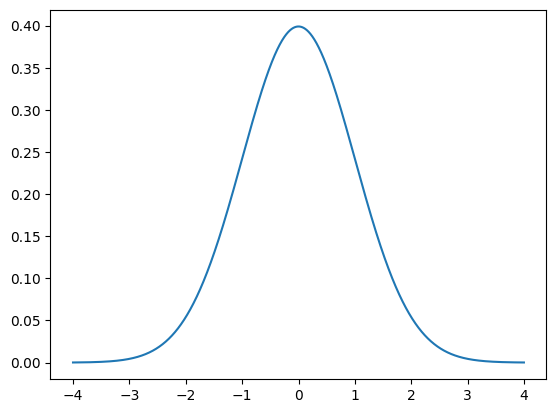

In [9]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.pdf(x, 0.0, 1.0))
plt.show()

##### Exercise 3.5

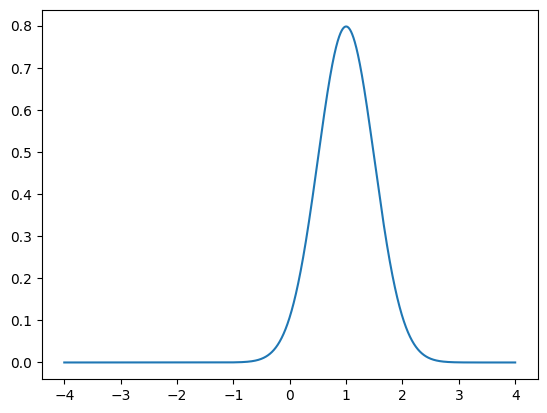

In [10]:
x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.pdf(x, 1.0, 0.5))
plt.show()

##### Exercise 3.6

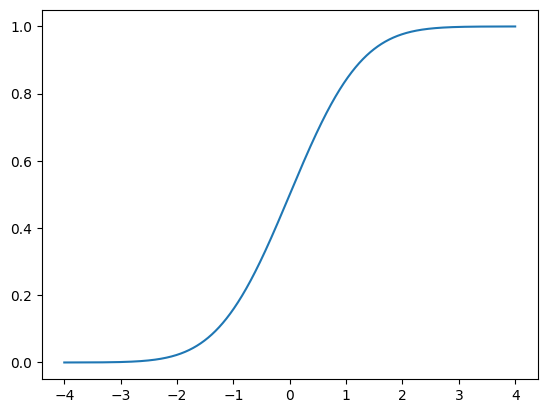

In [11]:
x = np.arange(-4, 4, 0.001)
plt.plot(x, norm.cdf(x, 0.0, 1.0))
plt.show()

##### Exercise 3.7

Use the CDF: the probability of $x$ being less than or equal to $x_0$ is given by $\mathrm{CDF}(x_0)$

In [12]:
prob = norm.cdf(49, 100, 37)
print(
    "Probability x is less than 49 with mean of 100 and std dev of 37: ",
    round(100 * prob, 2),
    "%",
)

Probability x is less than 49 with mean of 100 and std dev of 37:  8.4 %


In [13]:
def returnone(x):
    return 1


# This has the same effect:

returnone = lambda x: 1

In [40]:
expected_value = norm.expect(returnone, loc=0, scale=1, lb=0, ub=1)
print(expected_value)

0.34134474606854304


##### Exercise 3.8

The expectation value of the uniform function over a PDF $f(x)$ on the bounds from $a$ to $b$ is given by $$ E[1]_a^b = \int_a^b f(x)\mathrm{d}x$$

Breaking this into improper integrals, $$ \left(\int_{-\infty}^b - \int_{-\infty}^a\right) f(x)\mathrm{d}x = \mathrm{CDF}(b) - \mathrm{CDF}(a)$$

Using Exercise 3.7 answer for comparison:

In [39]:
expected_value = norm.cdf([0,1],0,1)
print(expected_value[1]-expected_value[0])

0.3413447460685429


##### Exercise 3.9

In [ ]:
square = lambda x: x**2

expected_value = norm.expect(square, loc=50, scale=10, lb=0, ub=100)
print("Exp Val of $x^2$ on N(50,10) btwn 0 and 100: ", round(expected_value, 2))

Exp Val of $x^2$ on N(50,10) btwn 0 and 100:  2600.0


#### Double Gaussian

In [16]:
def doublegaussian(x):
    return 0.7 * norm.pdf(x, 10, 1) + 0.3 * norm.pdf(x, 10, 5)


import scipy.integrate as integrate

integrate.quad(doublegaussian, -100, 100)

(1.0, 6.464706030887841e-10)

Here the first element of the tuple is the calculated integral, while the second element is the absolute error in the result calculated by the algorithm.

##### Exercise 3.10

Use the previous `doublegaussian` function

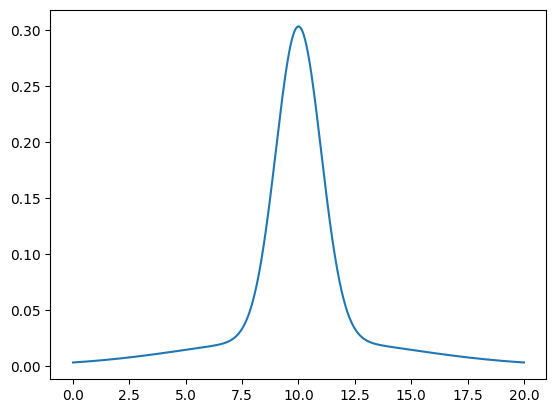

In [17]:
x = np.linspace(0, 20, 1000)
pdf = doublegaussian(x)

fig, ax = plt.subplots()
ax.plot(x, pdf)

In [18]:
intgrl = integrate.quad(doublegaussian, -1000, 1000)[0]  # 0 = integral, 1 = error
print("Double Gaussian Integral: ", f"{intgrl:.2f}")

Double Gaussian Integral:  1.00


In [19]:
def cdf_doublegaussian(x):
    return integrate.quad(doublegaussian, -1000, x)[0]

In [20]:
# Prob of x < 12
prob = cdf_doublegaussian(12)
print("Prob of x < 12: ", f"{prob:.2f}")

norm_prob = norm.cdf(12, 10, 5)
print("Single Gaussian N(10,5) with x < 12: ", f"{norm_prob:.2f}")

if prob > norm_prob:
    print("Double Gaussian is higher")
else:
    print("Double Gaussian is lower")

Prob of x < 12:  0.88
Single Gaussian N(10,5) with x < 12:  0.66
Double Gaussian is higher


#### Lognormal

##### Exercise 3.11

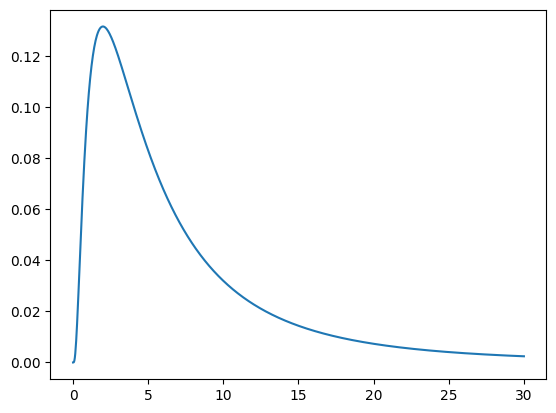

In [21]:
from scipy.stats import lognorm

x = np.linspace(0, 30, 1000)
pdf = lognorm.pdf(x, 0.96, 0, 5)

fig, ax = plt.subplots()
ax.plot(x, pdf)

In [22]:
std = lognorm.std(s=0.95, loc=0, scale=5)
print(f"stddev = {std:.3f}")

mean = lognorm.mean(s=0.95, loc=0, scale=5)
print(f"mean = {mean:.3f}")

prob_gt5 = 1 - lognorm.cdf(x=5, s=0.95, loc=0, scale=5)
print(f"probability x greater than 5 = {prob_gt5:.3f}")

stddev = 9.506
mean = 7.851
probability x greater than 5 = 0.500


#### Poisson

##### Exercise 3.12

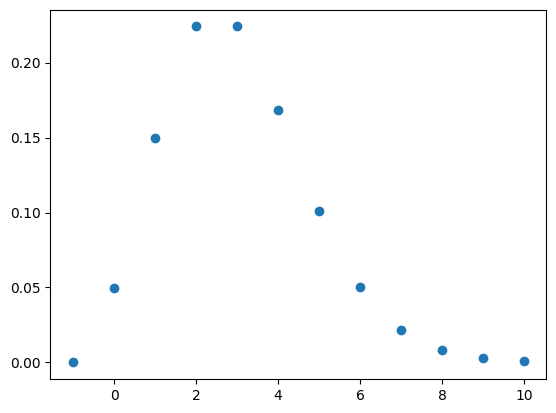

In [23]:
from scipy.stats import poisson

k = np.arange(-1, 11)
fig, ax = plt.subplots()
ax.plot(k, poisson.pmf(k, 3), "o")

In [24]:
mean = poisson.mean(3)
print(f"mean = {mean:.3f}")
std = poisson.std(3)
print(f"stddev = {std:.3f}")

prob_zero = poisson.pmf(0, 3)
print(f"probability of zero = {prob_zero:.3f}")

prob_le4 = poisson.cdf(4, 3)
print(f"probability of <=4 = {prob_le4:.3f}")

prob_gt6 = 1 - poisson.cdf(6, 3)
print(f"probability of >6 = {prob_gt6:.3f}")

mean = 3.000
stddev = 1.732
probability of zero = 0.050
probability of <=4 = 0.815
probability of >6 = 0.034


Be careful here! The CDF $F(x)$ *includes* the point $x$ itself. This is not so important for continuous distributions, but is very important for discrete distributions.

#### Binomial

##### Exercise 3.13

In [25]:
from scipy.stats import binom

p = 0.15

prob_3 = binom.pmf(k=3, n=20, p=p)
print(f"Probability of 3 photons = {prob_3:.3f}")

prob_gt4 = 1 - binom.cdf(k=4, n=20, p=p)
print(f"Probability of >4 photons = {prob_gt4:.3f}")

Probability of 3 photons = 0.243
Probability of >4 photons = 0.170


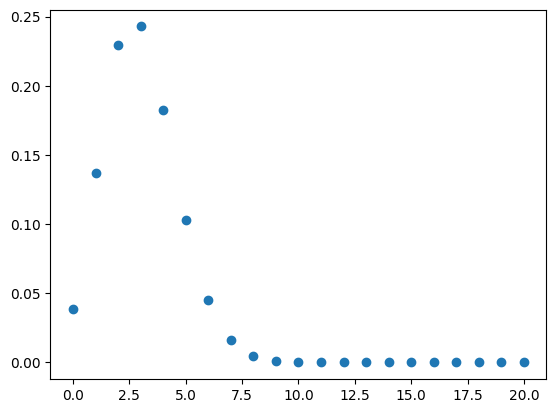

In [26]:
from scipy.stats import binom

p = 0.15
n = 20

x = np.array(range(0, 21))

pdf = binom.pmf(k=x, n=n, p=p)

fig, ax = plt.subplots()
ax.scatter(x, pdf)

#### Cauchy

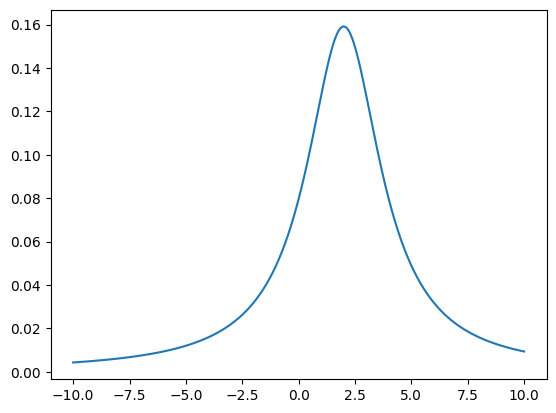

In [27]:
from scipy.stats import cauchy

x = np.linspace(-10, 10, 1000)

pdf = cauchy.pdf(x, loc=2, scale=2)

fig, ax = plt.subplots()
ax.plot(x, pdf)

#### Chi-squared

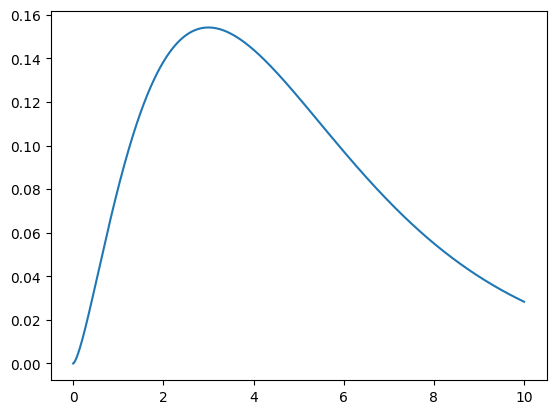

In [28]:
from scipy.stats import chi2

x = np.linspace(0, 10, 1000)

pdf = chi2.pdf(x, df=5)

fig, ax = plt.subplots()
ax.plot(x, pdf)

#### Beta

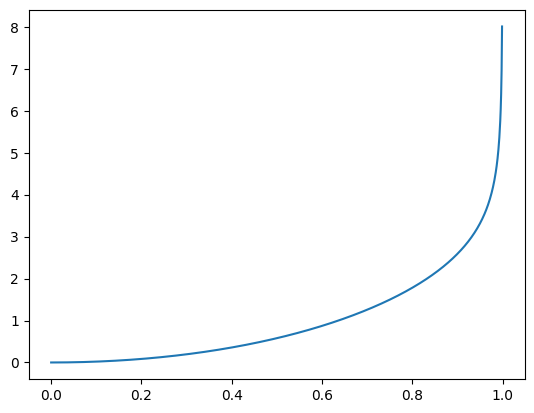

In [29]:
from scipy.stats import beta

x = np.linspace(0, 1, 1000)

pdf = beta.pdf(x, a=3, b=0.8)

fig, ax = plt.subplots()
ax.plot(x, pdf)

#### Crystal-Ball

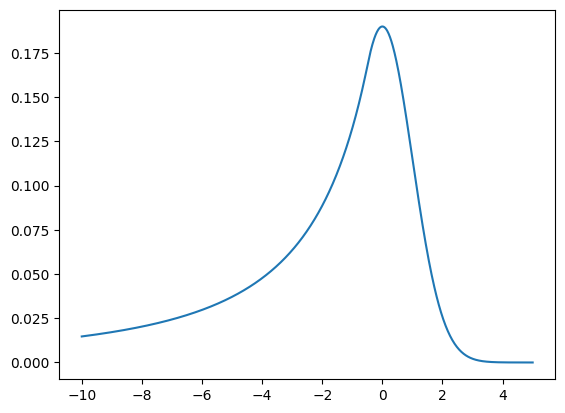

In [30]:
from scipy.stats import crystalball

x = np.linspace(-10, 5, 1000)

# beta is alpha in notes, m is n, loc and scale are xbar and sigma
pdf = crystalball.pdf(x, beta=0.5, m=2, loc=0, scale=1)

fig, ax = plt.subplots()
ax.plot(x, pdf)

#### Voight

In [31]:
import numpy as np
from scipy.special import wofz
import pylab


def G(x, alpha):
    """Return Gaussian line shape at x with half-width half-maximum alpha"""
    return np.sqrt(np.log(2) / np.pi) / alpha * np.exp(-((x / alpha) ** 2) * np.log(2))


def L(x, gamma):
    """Return Lorentzian line shape at x with half-width half-maximum gamma"""
    return gamma / np.pi / (x**2 + gamma**2)


def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component half-width
    half-maximum gamma
    and Gaussian component half-width half-maximum alpha.
    """
    sigma = alpha / np.sqrt(2 * np.log(2))
    return (
        np.real(wofz((x + 1j * gamma) / sigma / np.sqrt(2)))
        / sigma
        / np.sqrt(2 * np.pi)
    )

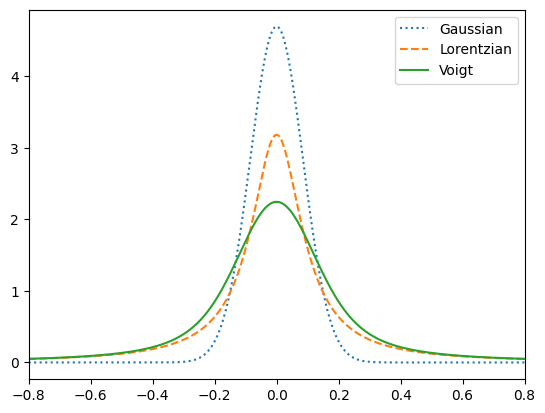

In [32]:
alpha, gamma = 0.1, 0.1
x = np.linspace(-0.8, 0.8, 1000)
fig, ax = plt.subplots()
ax.plot(x, G(x, alpha), ls=":", label="Gaussian")
ax.plot(x, L(x, gamma), ls="--", label="Lorentzian")
ax.plot(x, V(x, alpha, gamma), label="Voigt")
ax.set_xlim(-0.8, 0.8)
ax.legend()

##### Exercise 3.14

In [33]:
from scipy.signal import peak_widths, find_peaks

peaks_G, _ = find_peaks(G(x, alpha))
width_G = peak_widths(G(x, alpha), peaks_G)[0]

peaks_L, _ = find_peaks(L(x, gamma))
width_L = peak_widths(L(x, gamma), peaks_L)[0]

peaks_V, _ = find_peaks(V(x, alpha, gamma))
width_V = peak_widths(V(x, alpha, gamma), peaks_V)[0]

print(f"Gauss Width: {width_G[0]:.3f}")
print(f"Lorentz Width: {width_L[0]:.3f}")
print(f"Voight Width: {width_V[0]:.3f}")

Gauss Width: 124.879
Lorentz Width: 122.976
Voight Width: 200.717


### Correlations

##### Exercise 3.15

In [34]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
x

array([[0, 1, 2],
       [2, 1, 0]])

##### Exercise 3.16

In [35]:
cov_x = np.cov(x)
cov_x

array([[ 1., -1.],
       [-1.,  1.]])

This covariance matrix tells us the standard deviation of each variable is $\sqrt{1}=1$, and that the covariance between the two variables is $-1$. 

The negative covariance indicates our variables are anti-correlated, implying as one increases, the other decreases. 

##### Exercise 3.17

In [36]:
x = np.array(
    [[1.2, 300, -2.3], [4.6, 201.2, 3.5], [10.1, 500.89, -6.4], [3.4, 301.5, -7.01]]
).T

cov_x = np.cov(x)
cov_x

array([[ 1.43491667e+01,  3.59929083e+02, -5.40691667e+00],
       [ 3.59929083e+02,  1.58125867e+04, -4.41934175e+02],
       [-5.40691667e+00, -4.41934175e+02,  2.34563583e+01]])

The diagonal elements of this matrix give the variance of each variable, while the off-diagonal elements are the co-variances between variables. These numbers differ wildly in scale, due to the different scales of values in the variables themselves. 

##### Exercise 3.18

Using previous `x`

In [37]:
corr_coef = np.corrcoef(x)
corr_coef

array([[ 1.        ,  0.75561773, -0.29471758],
       [ 0.75561773,  1.        , -0.72564772],
       [-0.29471758, -0.72564772,  1.        ]])

All values are between -1 and 1, which we want! These will now indicate the correlation between variables using a normalised value.

From this, we see each variable is perfectly correlated to itself (as expected), while variables $x_0$ and $x_1$ are strongly correlated, $x_1$ and $x_2$ are strongly anti-correlated, and $x_0$ and $x_2$ are less strongly anti-correlated.